
# Iris Dataset
---
Por: Ángela Daniela Córdoba Álvarez


---




Creamos una función que va a servir para cargar los datos del archivo .data en
un DataFrame de pandas.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import euclidean, cityblock
from scipy.spatial import distance

def load_data(filename):
    # Carga el archivo .data como un DataFrame de pandas
    data = pd.read_csv(filename, header=None)  # Asume que el archivo no tiene encabezado

    return data

# Uso de la función
filename = 'iris.data'  # Nombre del archivo
data = load_data(filename)

# Renombrarle las columnas
column_names = ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth', 'Class']
data.columns = column_names
data

,SepalLength,SepalWidth,PetalLength,PetalWidth,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


Calculamos el promedio de cada especie o clase.

In [2]:
promedio = data.groupby('Class').mean()
promedio

,SepalLength,SepalWidth,PetalLength,PetalWidth
Class,,,,
Iris-setosa,5.006,3.418,1.464,0.244
Iris-versicolor,5.936,2.770,4.260,1.326
Iris-virginica,6.588,2.974,5.552,2.026


Una vez se tengan los promedios de las tres especies, calcular la distancia Manhattan y euclidiana entre cada par de promedios.

In [3]:
clase = promedio.index.tolist()

# Iterar sobre cada par de clases
for i in range(len(clase)):
    for j in range(i+1, len(clase)):
        # Calcular la distancia de Manhattan entre los promedios de las características de las dos clases
        dist_manhattan = distance.cityblock(promedio.loc[clase[i]], promedio.loc[clase[j]])
        # Calcular la distancia euclidiana entre los promedios de las características de las dos clases
        dist_euclidiana = euclidean(promedio.loc[clase[i]], promedio.loc[clase[j]])

        # Imprimir las distancias
        print(f"Distancia Manhattan entre {clase[i]} y {clase[j]}: {dist_manhattan}")
        print(f"Distancia euclidiana entre {clase[i]} y {clase[j]}: {dist_euclidiana}")
        print()


Distancia Manhattan entre Iris-setosa y Iris-versicolor: 5.4559999999999995
Distancia euclidiana entre Iris-setosa y Iris-versicolor: 3.2051745662288034

Distancia Manhattan entre Iris-setosa y Iris-virginica: 7.896000000000001
Distancia euclidiana entre Iris-setosa y Iris-virginica: 4.752591714001952

Distancia Manhattan entre Iris-versicolor y Iris-virginica: 2.848
Distancia euclidiana entre Iris-versicolor y Iris-virginica: 1.6204888151419006



Graficar las distancias y sacar conclusiones de lo observado.


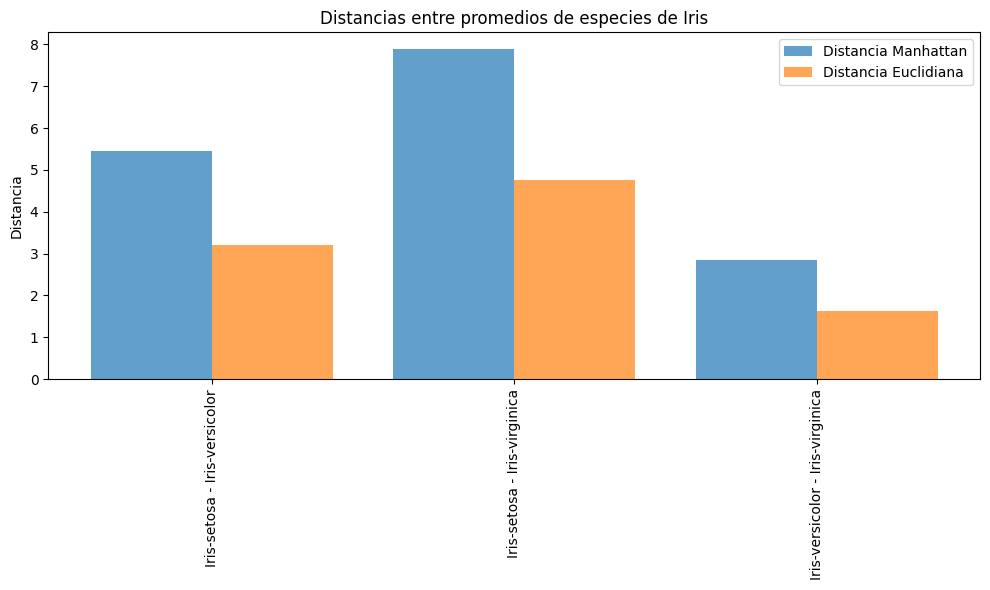

In [4]:
# Graficar las distancias
plt.figure(figsize=(10, 6))

'''
Diagrama de barras
'''
# Etiquetas y posiciones para las barras
labels = [f"{clase[i]} - {clase[j]}" for i in range(len(clase)) for j in range(i+1, len(clase))]
x_pos = np.arange(len(labels))
manhattan_distances = [distance.cityblock(promedio.loc[clase[i]], promedio.loc[clase[j]]) for i in range(len(clase)) for j in range(i+1, len(clase))]
euclidean_distances = [euclidean(promedio.loc[clase[i]], promedio.loc[clase[j]]) for i in range(len(clase)) for j in range(i+1, len(clase))]

plt.bar(x_pos, manhattan_distances, width=0.4, align='center', alpha=0.7, label='Distancia Manhattan')
plt.bar(x_pos + 0.4, euclidean_distances, width=0.4, align='center', alpha=0.7, label='Distancia Euclidiana')

plt.xticks(x_pos + 0.2, labels, rotation='vertical')
plt.ylabel('Distancia')
plt.title('Distancias entre promedios de especies de Iris')
plt.legend()
plt.tight_layout()
plt.show()

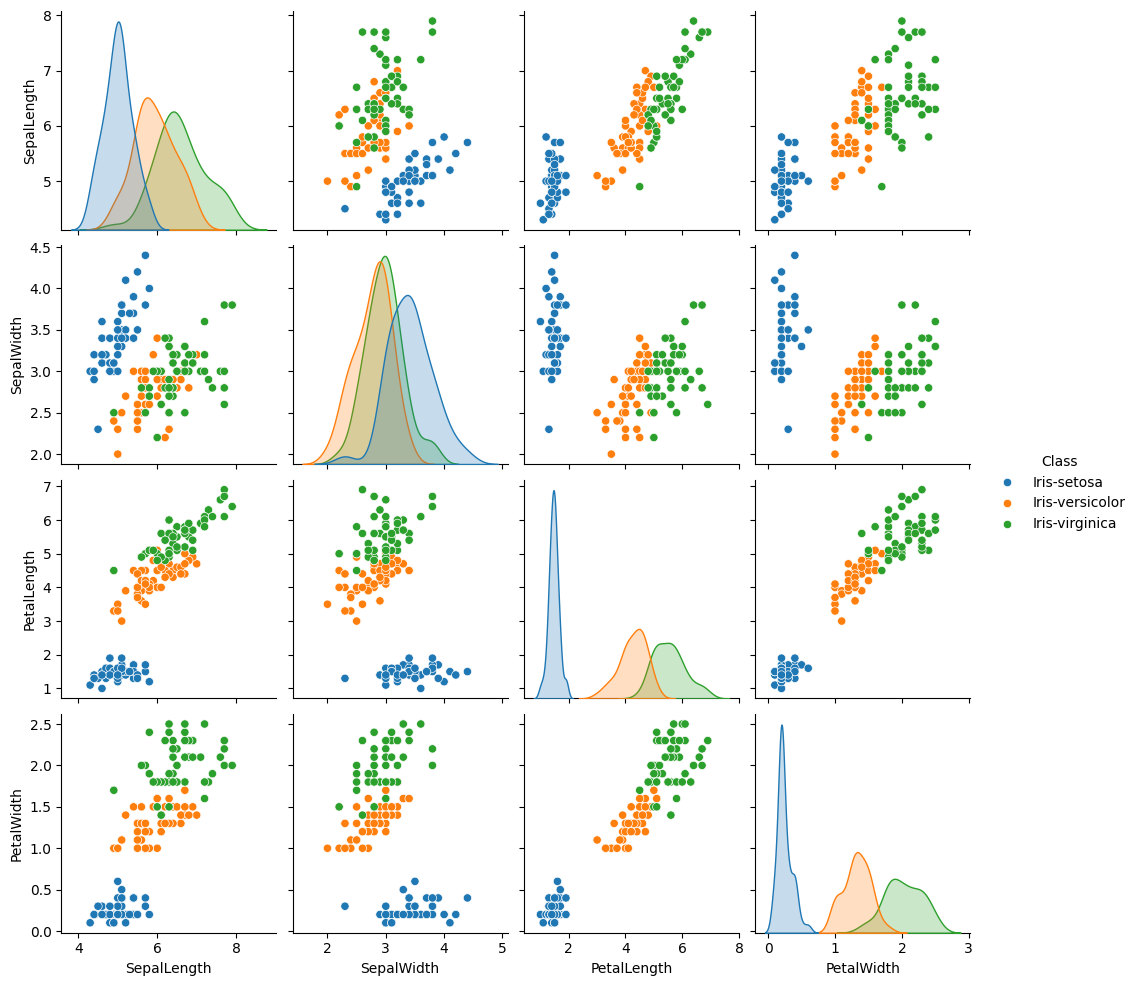

In [5]:
# Más gráficas, diferentes modelos
'''
Scatter plot
'''
import seaborn as sns

sns.pairplot(data, hue='Class', vars=['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth'])
plt.show()

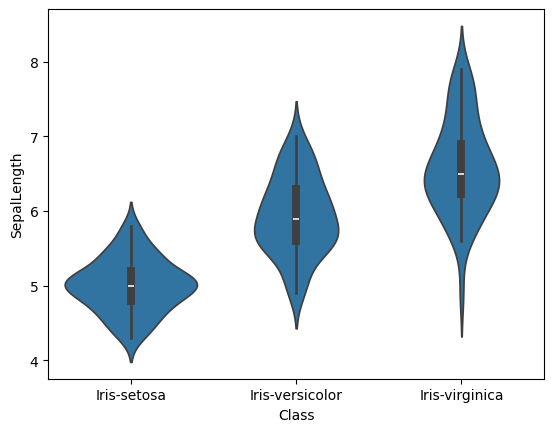

In [6]:
'''
Violin plot
'''
sns.violinplot(x='Class', y='SepalLength', data=data)
plt.show()

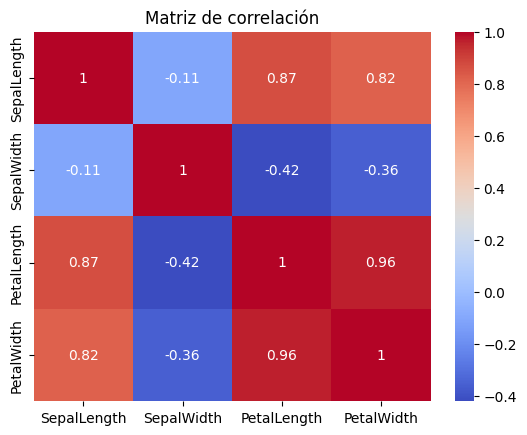

In [7]:
'''
Heatmap
'''
# Calcular la correlación solo en columnas numéricas
corr = data.drop('Class', axis=1).corr()

# Crear el mapa de calor
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Matriz de correlación')
plt.show()

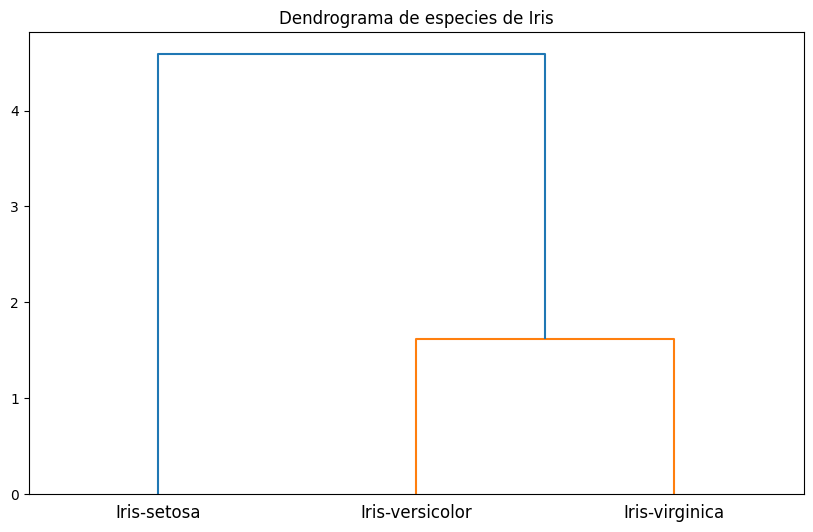

In [8]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Calcula la matriz de enlace
Z = linkage(promedio, method='ward')

# Dibuja el dendrograma
plt.figure(figsize=(10, 6))
dendrogram(Z, labels=clase, orientation='top')
plt.title('Dendrograma de especies de Iris')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


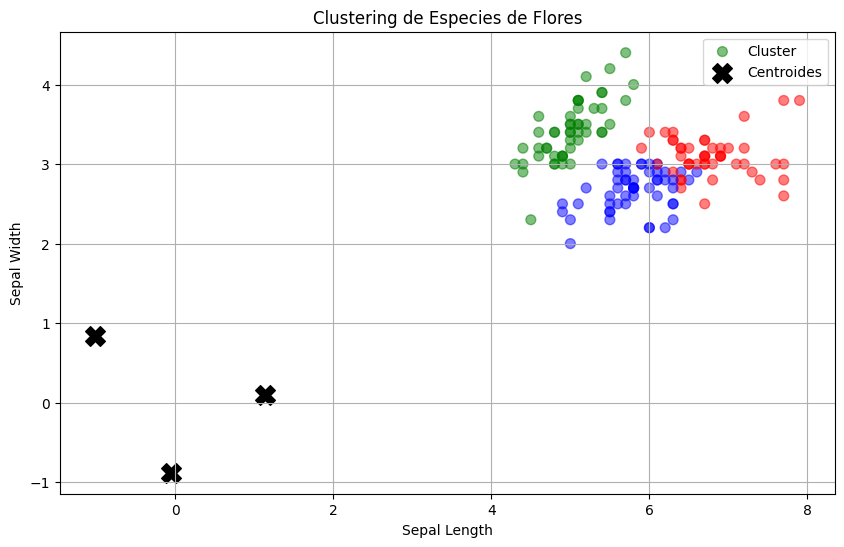

In [9]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Extraer características para clustering
X = data[['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth']]

# Escalar las características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicar K-Means para agrupar las especies
kmeans = KMeans(n_clusters=3, random_state=42)
data['Cluster'] = kmeans.fit_predict(X_scaled)

# Graficar los clusters
plt.figure(figsize=(10, 6))

# Color map
colors = np.array(['red', 'green', 'blue'])

# Scatter plot
plt.scatter(data['SepalLength'], data['SepalWidth'], c=colors[data['Cluster']], s=50, alpha=0.5, label='Cluster')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='black', s=200, marker='X', label='Centroides')

plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Clustering de Especies de Flores')
plt.legend()
plt.grid(True)
plt.show()


**Conclusiones:**
* Los clusters generados por K-Means muestran cómo las especies de flores se agrupan según la similitud en las medidas de las características. Cada cluster representa un grupo de especies que tienen medidas de sépalos y pétalos similares entre sí.

* Los centroides indican el punto central de cada cluster, representando las características promedio del grupo de especies en ese cluster. Además, ayudan a visualizar dónde se localizan los centros de agrupamiento para cada cluster, lo que facilita la interpretación de cómo se dividen las especies en grupos distintos.

* En el gráfico de dispersión, observamos cómo las flores se agrupan en áreas distintas del espacio definido por las medidas de sépalos.

#### Ejercicio:
1. ¿Puede un modelo agrupar datos con base en estas medidas?
2. ¿Si no se tuviese la especie de la flor como dato en el dataset, se podría encontrar cuántas especies existen? ¿Cómo se emplearía la medida de distancia para ese fin?


**DESARROLLO:**
> 1. Sí, un modelo puede agrupar datos con base en medidas de distancia como la distancia euclidiana y la distancia de Manhattan, ya que estos algoritmos de agrupamiento o clustering utilizan las distancias entre los puntos de datos para determinar finalmente cómo agruparlos.

> 2. Sí, incluso sin conocer la especie o la clase de la flor, se podrían utilizar algoritmos de agrupamiento para intentar determinar el número de especies. La medida de distancia sería importante en este proceso, ya que permitiría al algoritmo identificar grupos de puntos de datos que están cerca entre sí.